# Loan Prediction Project

### Problem Statement

Company

Dream Housing Finance company deals in all home loans.  
They have presence across all urban, semi urban and rural areas.  
Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.  
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.  
To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



Variable	Description  
Loan_ID	Unique Loan ID  
Gender	Male/ Female  
Married	Applicant married (Y/N)  
Dependents	Number of dependents  
Education	Applicant Education (Graduate/ Under Graduate)  
Self_Employed	Self employed (Y/N)  
ApplicantIncome	Applicant income  
CoapplicantIncome	Coapplicant income  
LoanAmount	Loan amount in thousands  
Loan_Amount_Term	Term of loan in months  
Credit_History	credit history meets guidelines  
Property_Area	Urban/ Semi Urban/ Rural  
Loan_Status	Loan approved (Y/N)  

### Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Load the data

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Statistical Summary of the dataset

In [5]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observation:-  
    1. There are 13 columns in the dataset.  
    2. The loan status is the target variable.  
    3. Some columns have null values present.  
    4. Loan ID is just an unique identifier which has no effect on the target variable.

## Preprocessing of data 

In this step 2 transformation are will be made to dataset  
    1. Dealing with missing values  
    2. Encoding categorical variables

In [9]:
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

### 1. Dealing with the missing values

To deal with the missing values I have taken mode of the columns which contain missing values.  
The below output shows the compasion of dataset columns before and after dealing with the missing values.

In [13]:
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']
for col in null_cols:
    print(f"{col}:\n{train_df[col].value_counts()}\n","-"*50)
    train_df[col] = train_df[col].fillna(train_df[col].dropna().mode().values[0] )   


print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{train_df[col].value_counts()}\n","-"*50)

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype: int64
 --------------------------------------------------
Married:
Yes    398
No   

### EDA

In this step the categorical variables and numerical variables are seperated and analysis is done on them seperately

In [11]:
#list of all the columns.columns
#Cols = tr_df.tolist()
#list of all the numeric columns
num = train_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = train_df.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  train_df[num]
#categoric df
loan_cat = train_df[cat]

In [12]:
sns.set(rc={'figure.figsize':(5,5)})

Y    422
N    192
Name: Loan_Status, dtype: int64


C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


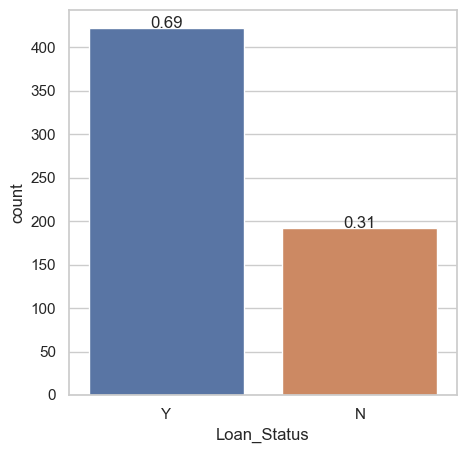

In [14]:
print(train_df[cat[-1]].value_counts())
#tr_df[cat[-1]].hist(grid = False)

#print(i)
total = float(len(train_df[cat[-1]]))
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.countplot(train_df[cat[-1]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height ,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

In this given dataset aprroximately 70% of the loan is approved and 30 % is rejected

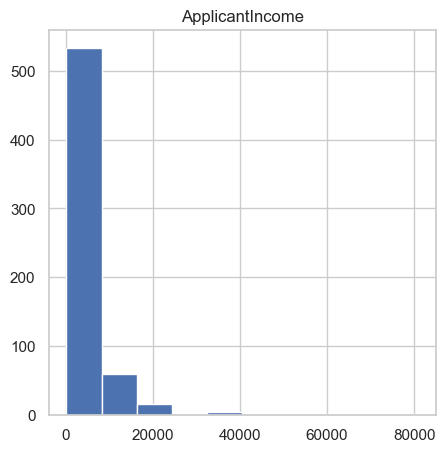

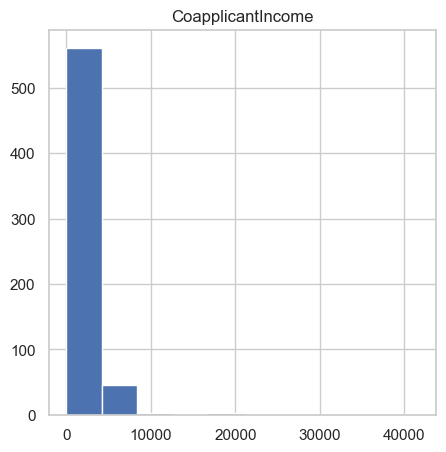

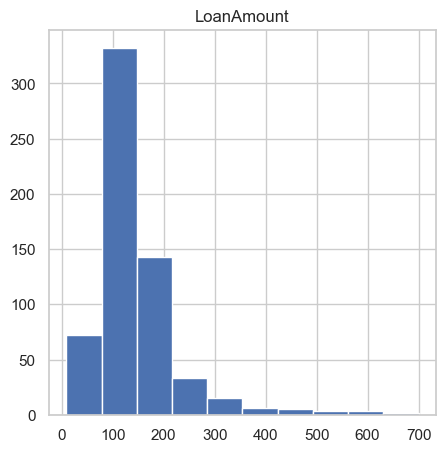

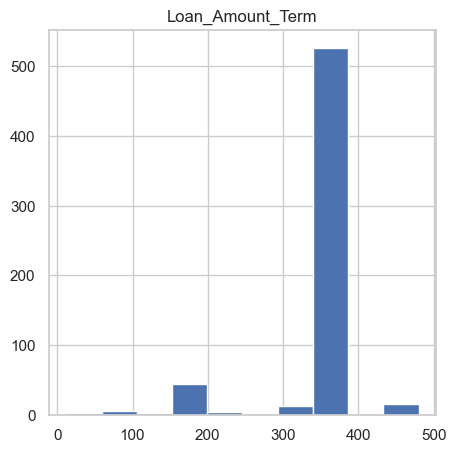

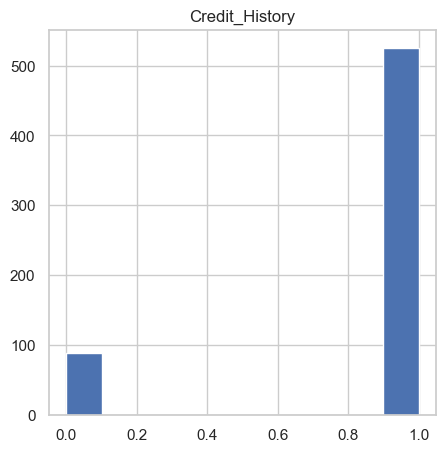

In [15]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

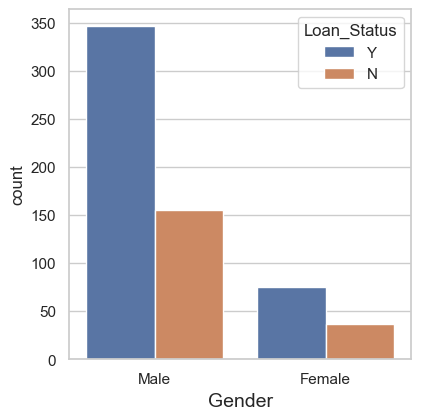

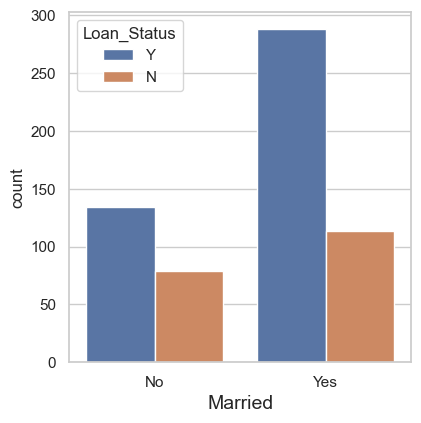

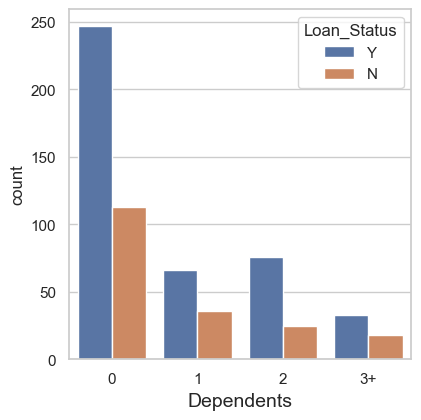

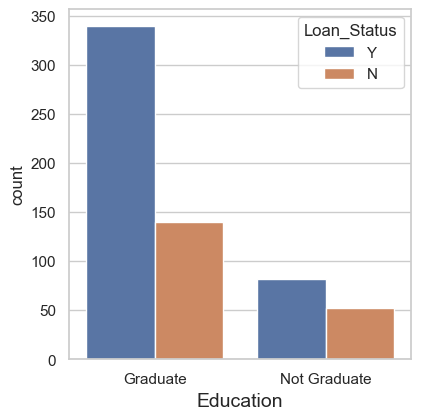

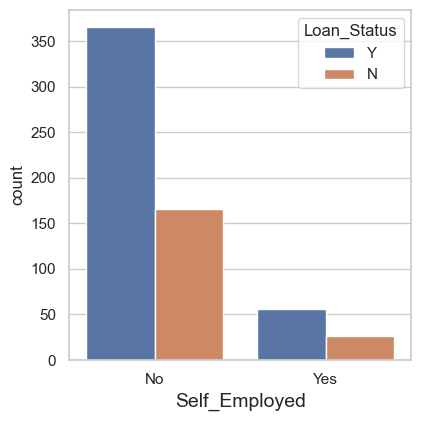

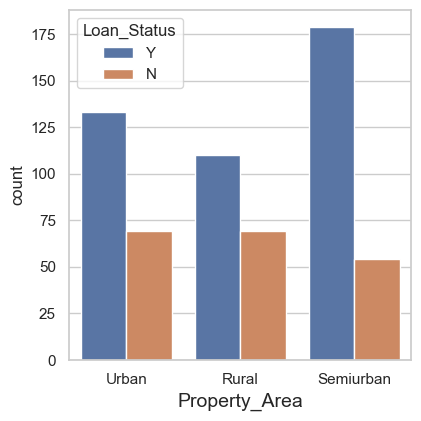

In [16]:
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=train_df )
    plt.xlabel(i, fontsize=14)

1.Sex: There are more Men than Women.  

2.Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.  

3.Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.  

4.Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval  

5.Employment: 5/6th of population is not self employed.  

6.Property Area: More applicants from Semi-urban and also likely to be granted loans.  

7.Applicant with credit history are far more likely to be accepted.  

8.Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).  

### 2. Encoding categorical variables

To deal with categorical variable I've used label encoding.

In [17]:
to_numeric = {'Male': 2, 'Female': 1,
'Yes': 2, 'No': 1,
'Graduate': 2, 'Not Graduate': 1,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
train_df = train_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
teset_df = test_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Dependents_ = pd.to_numeric(train_df.Dependents)
#Dependents__ = pd.to_numeric(test_df.Dependents)

# dropping the previous Dependents column
train_df.drop(['Dependents'], axis = 1, inplace = True)
test_df.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
train_df = pd.concat([train_df, Dependents_], axis = 1)
#test_df = pd.concat([test_df, Dependents__], axis = 1)


### Feature Selection

In [7]:
train_df.drop('Loan_ID',axis=1,inplace=True)  # Dropping the Loan Id variable

<AxesSubplot:>

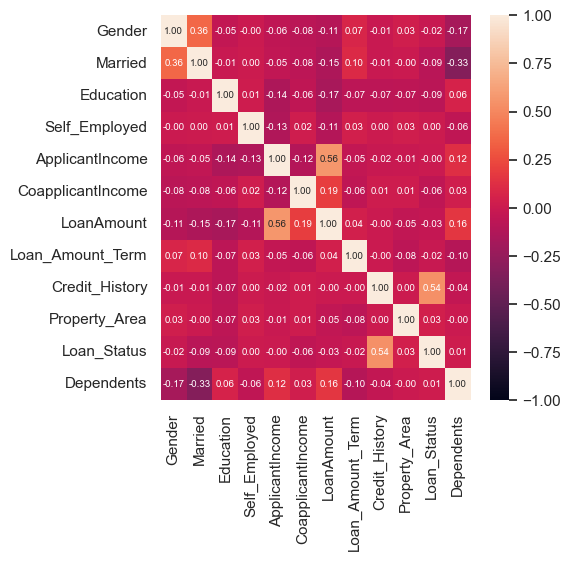

In [39]:
sns.heatmap(train_df.corr(), annot=True, fmt=".2f",
           vmin=-1, vmax=1,  annot_kws={'size': 7})

In [27]:
#correlation table
corr = train_df.corr()
corr.style.background_gradient(cmap = "coolwarm").set_precision(2)
#plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

C:\Users\Radhey\AppData\Local\Temp\ipykernel_11260\64684373.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap = "coolwarm").set_precision(2)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.00,0.36,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02,-0.17
Married,0.36,1.00,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09,-0.33
Education,-0.05,-0.01,1.00,0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09,0.06
Self_Employed,-0.00,0.00,0.01,1.00,-0.13,0.02,-0.11,0.03,0.00,0.03,0.00,-0.06
ApplicantIncome,-0.06,-0.05,-0.14,-0.13,1.00,-0.12,0.56,-0.05,-0.02,-0.01,-0.00,0.12
CoapplicantIncome,-0.08,-0.08,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,0.03
LoanAmount,-0.11,-0.15,-0.17,-0.11,0.56,0.19,1.00,0.04,-0.00,-0.05,-0.03,0.16
Loan_Amount_Term,0.07,0.10,-0.07,0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02,-0.10
Credit_History,-0.01,-0.01,-0.07,0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54,-0.04
Property_Area,0.03,-0.00,-0.07,0.03,-0.01,0.01,-0.05,-0.08,0.00,1.00,0.03,-0.00


## Building the model

In [40]:
y = train_df['Loan_Status']
X = train_df.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Logistice Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [47]:
LR = LogisticRegression(solver = 'saga', max_iter = 400, random_state = 2)
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)


print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('Accuracy of the model is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.72      1.00      0.84       134

    accuracy                           0.72       185
   macro avg       0.36      0.50      0.42       185
weighted avg       0.52      0.72      0.61       185

Accuracy of the model is 0.7243243243243244


C:\Users\Radhey\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Radhey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Radhey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Radhey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pre

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
RF = RandomForestClassifier(n_estimators= 1000, random_state=1,max_leaf_nodes=20)
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)


print(classification_report(y_test, y_predict))

print(confusion_matrix(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185

82.16% Accurate


### knn

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
knn_SC = accuracy_score(y_predict,y_test)
print(f"{round(knn_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.26      0.18      0.21        51
           1       0.72      0.81      0.76       134

    accuracy                           0.63       185
   macro avg       0.49      0.49      0.48       185
weighted avg       0.59      0.63      0.61       185

63.24% Accurate


### xgboost

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
from xgboost import XGBClassifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree',
                    eval_metric='mlogloss',
                    n_estimators=500,max_depth=7)
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        51
           1       0.84      0.90      0.87       134

    accuracy                           0.80       185
   macro avg       0.75      0.72      0.73       185
weighted avg       0.79      0.80      0.79       185

80.0% Accurate


In [30]:
score = [LR_SC,knn_SC,XGB_SC,RF_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Logistic Regression","k-Nearest Neighbors","XGBoost", "Random Forest"],
    'Score': score})
Models
#Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
0,Logistic Regression,0.724324
1,k-Nearest Neighbors,0.632432
2,XGBoost,0.800000
3,Random Forest,0.821622


In [31]:
from xgboost import XGBClassifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree',eval_metric='mlogloss',n_estimators=500,max_depth=7)
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(confusion_matrix(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

[[ 28  23]
 [ 14 120]]
80.0% Accurate
